In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [13]:
server_list = ['10.101.1.57','10.101.1.58', '10.101.1.192']
data = pd.read_csv('/Users/mac/Desktop/data.csv')

data.csv 記錄檔案位於 ASUS 設備上 10.101.218.245:/home/edt/MQTT_recorder/data.csv

請使用 scp 複製到本地端

> scp edt@10.101.218.245:/home/edt/MQTT_recorder/data.csv .

In [14]:
# 抓所需時間範圍及繪圖年月標題

plot_time_title = 'Feb. 2022'
data = data.loc[(data['time'] >= '2022-02-01T') & (data['time'] < '2022-03-01T'),]

# 圖一

Text(0.5, 1.0, 'Queue length (Feb. 2022)')

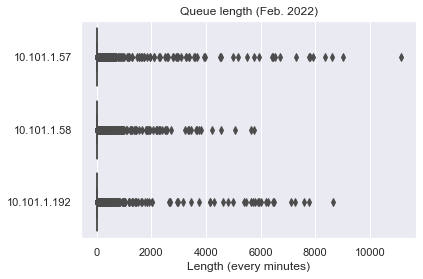

In [15]:
sns.boxplot(x="mqueue_len", y="server_ip", data=data, order=server_list)
plt.ylabel('')
plt.xlabel('Length (every minutes)')
plt.title('Queue length (%s)' % plot_time_title)

# 圖二

In [16]:
b = data.pivot(index='time', columns='server_ip', values='received_messages').diff()
b['grp'] = pd.to_datetime(b.index).strftime('%H:%M')
b.loc[b['grp'] == '10:00', '10.101.1.57'] = np.NaN
b.loc[b['grp'] == '10:00', '10.101.1.58'] = np.NaN
b.loc[b['grp'] == '10:00', '10.101.1.192'] = np.NaN
b = b.groupby('grp').agg(['mean', 'std', 'max'])

In [17]:
def plot_received_messages(data, server_ip, ax, add_title=None, y_max=None):
    
    data[server_ip][['mean', 'max']].plot(ax=ax)
    avg = data[server_ip]['mean']
    std = data[server_ip]['std']
    ax.fill_between(data.index, avg - 2 * std, avg + 2 * std, color='b', alpha=.2)
    title = '[%s] Received messages' % server_ip
    if add_title:
        title += ' (%s)' % add_title
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Messages')
    if y_max:
        ax.set_ylim([0, y_max])

/Users/mac/.pyenv/versions/3.6.12/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/mac/.pyenv/versions/3.6.12/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/mac/.pyenv/versions/3.6.12/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


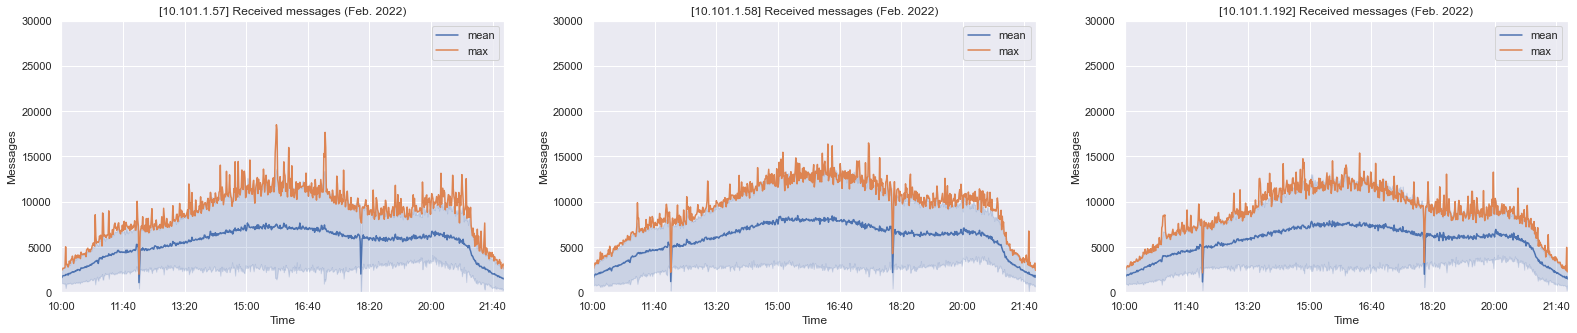

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27,5))
plot_received_messages(b, '10.101.1.57', ax1, add_title = plot_time_title, y_max = 30000)
plot_received_messages(b, '10.101.1.58', ax2, add_title = plot_time_title, y_max = 30000)
plot_received_messages(b, '10.101.1.192', ax3, add_title = plot_time_title, y_max = 30000)